# Image augmentations
Up to now, we've explored how image translation issues can impact a model's predictive accuracy. However, real-world scenarios often present a range of challenges:

- Slight rotations or tilts in images
- Scaling (zooming in/out)
- Presence of varying degrees of noise
- Low brightness in images
- Flipping of images
- Shearing (twisting one side of the image)

A neural network that doesn't account for these scenarios won't yield accurate results, much like the neural network we encountered earlier that wasn't explicitly trained on heavily translated images.

Image augmentations prove invaluable when generating additional images from an original one. Each new image can differ in rotation, translation, scale, noise, and brightness. Moreover, the degree of variation in these parameters can also vary—for instance, one iteration might translate an image by +10 pixels while another might do so by -5 pixels.

The 'augmenters' class within the imgaug package offers helpful tools for executing these augmentations. Let's delve into the diverse utilities available in this class for creating augmented images from a base image. Among the notable augmentation techniques are:

- Affine transformations
- Adjusting brightness
- Introducing noise


<strong>Affine Transformations</strong>: Affine transformations encompass translating, rotating, scaling, and shearing an image, performed via the Affine method within the augmenters class. This method includes essential parameters:

a. Scale: Determines the zoom level applied to the image.

b. Translate_percent: Specifies translation as a percentage of the image's dimensions.

c. Translate_px: Indicates translation in absolute pixel values.

d. Rotate: Determines the degree of image rotation.

e. Shear: Specifies the degree of rotation for a portion of the image.

Scaling, translation, and rotation play crucial roles in image manipulation. Now, before delving into other parameters, it's important to grasp how scaling, translation, and rotation prove beneficial in image processing.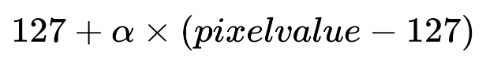

In [ ]:
%%capture
!pip install -U imgaug

In [ ]:
import imgaug
print(imgaug.__version__)

import imgaug.augmenters as iaa
from torchvision import datasets
import torch

data_folder = '/content/' # This can be any directory you want to download FMNIST to
fmnist = datasets.FashionMNIST(data_folder, download=True, train=True)

tr_images = fmnist.data
tr_targets = fmnist.targets


0.4.0


100%|██████████| 26421880/26421880 [00:01<00:00, 14367270.75it/s]


Extracting /content/FashionMNIST/raw/train-images-idx3-ubyte.gz to /content/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 273356.94it/s]


Extracting /content/FashionMNIST/raw/train-labels-idx1-ubyte.gz to /content/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 4964521.27it/s]


Extracting /content/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to /content/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 4939894.07it/s]


Extracting /content/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to /content/FashionMNIST/raw



Text(0.5, 1.0, 'Original image')

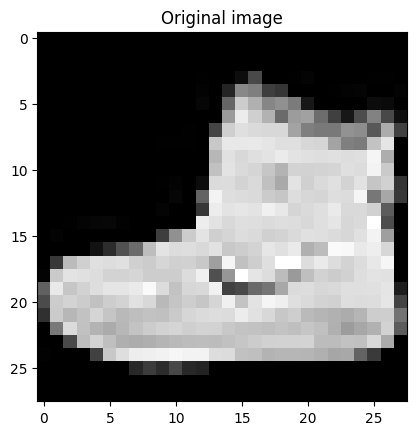

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from torch.utils.data import Dataset, DataLoader
import torch
import torch.nn as nn
device = 'cuda' if torch.cuda.is_available() else 'cpu'

def to_numpy(tensor):
    return tensor.cpu().detach().numpy()


plt.imshow(tr_images[0], cmap='gray')
plt.title('Original image')

## Perform scaling on top of the image:

Text(0.5, 1.0, 'Scaled image')

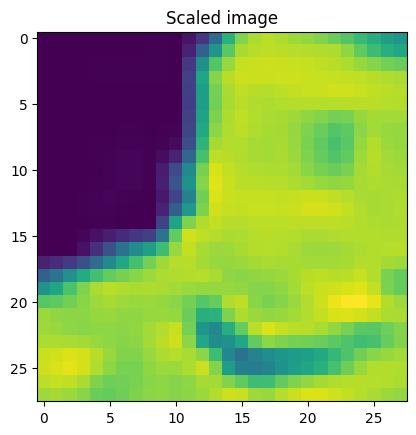

In [ ]:
aug = iaa.Affine(scale=2)
plt.imshow(aug.augment_image(to_numpy(tr_images[0])))
plt.title('Scaled image')

Text(0.5, 1.0, 'Translated image by 10 pixels (right and bottom)')

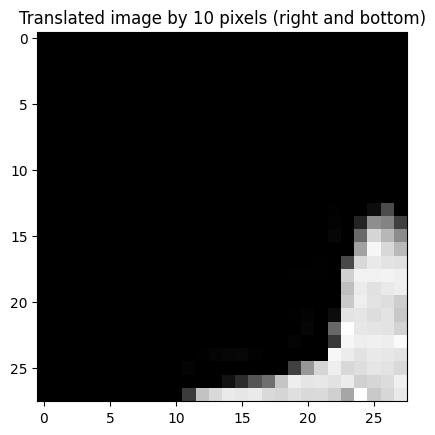

In [ ]:
aug = iaa.Affine(translate_px=10)
plt.imshow(aug.augment_image(to_numpy(tr_images[0])), cmap='gray')
plt.title('Translated image by 10 pixels (right and bottom)')

Text(0.5, 1.0, 'Translation of 10 pixels \nacross columns and 2 pixels over rows')

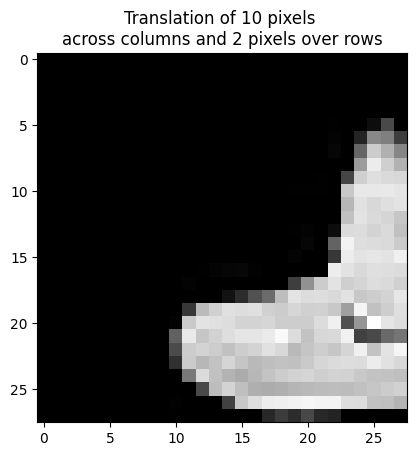

In [ ]:
aug = iaa.Affine(translate_px={'x':10,'y':2})
plt.imshow(aug.augment_image(to_numpy(tr_images[0])), cmap='gray')
plt.title('Translation of 10 pixels \nacross columns and 2 pixels over rows')

Text(0.5, 1.0, 'Rotation of image by 30 degrees')

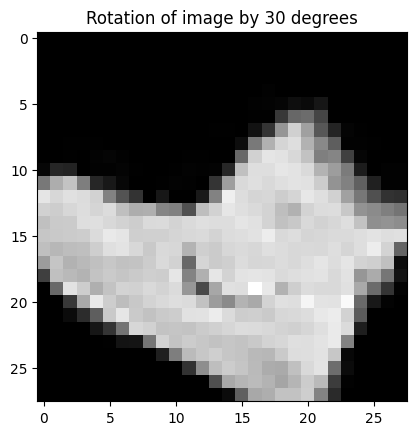

In [ ]:
aug = iaa.Affine(rotate=30)
plt.imshow(aug.augment_image(to_numpy(tr_images[0])), cmap='gray')
plt.title('Rotation of image by 30 degrees')

Text(0.5, 1.0, 'Rotation of image by -30 degrees')

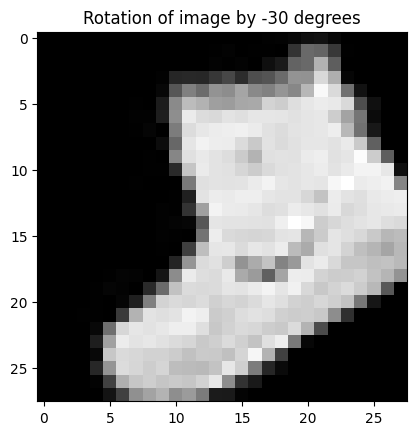

In [ ]:
aug = iaa.Affine(rotate=-30)
plt.imshow(aug.augment_image(to_numpy(tr_images[0])), cmap='gray')
plt.title('Rotation of image by -30 degrees')

Text(0.5, 1.0, 'Shear of image by -30 degrees')

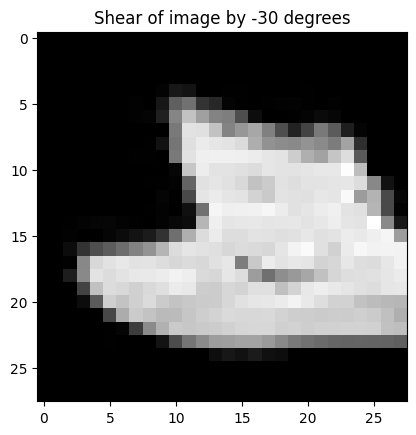

In [ ]:
aug = iaa.Affine(shear=-30)
plt.imshow(aug.augment_image(to_numpy(tr_images[0])), cmap='gray')
plt.title('Shear of image by -30 degrees')

Text(0.5, 1.0, 'Shear of image \nby 30 degrees')

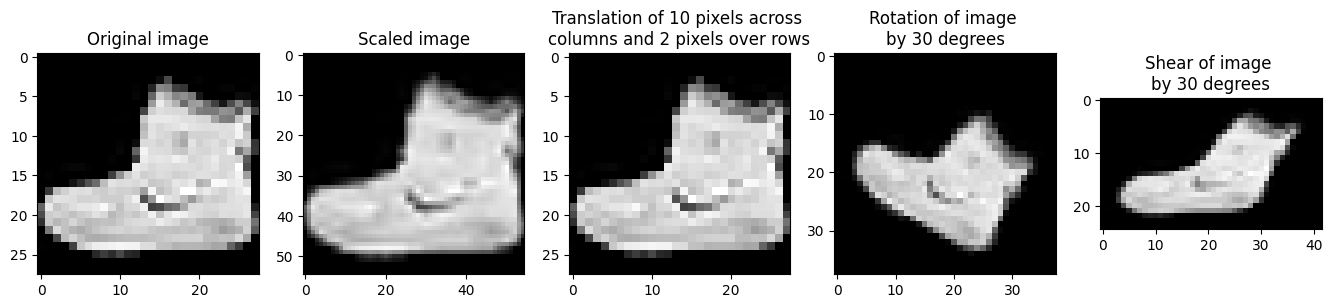

In [ ]:
plt.figure(figsize=(20,20))
plt.subplot(161)
plt.imshow(tr_images[0], cmap='gray')
plt.title('Original image')
plt.subplot(162)
aug = iaa.Affine(scale=2, fit_output=True)
plt.imshow(aug.augment_image(to_numpy(tr_images[0])), cmap='gray')
plt.title('Scaled image')
plt.subplot(163)
aug = iaa.Affine(translate_px={'x':10,'y':2}, fit_output=True)
plt.imshow(aug.augment_image(to_numpy(tr_images[0])), cmap='gray')
plt.title('Translation of 10 pixels across \ncolumns and 2 pixels over rows')
plt.subplot(164)
aug = iaa.Affine(rotate=30, fit_output=True)
plt.imshow(aug.augment_image(to_numpy(tr_images[0])), cmap='gray')
plt.title('Rotation of image \nby 30 degrees')
plt.subplot(165)
aug = iaa.Affine(shear=30, fit_output=True)
plt.imshow(aug.augment_image(to_numpy(tr_images[0])), cmap='gray')
plt.title('Shear of image \nby 30 degrees')

The cval parameter solves this issue. It specifies the pixel value of the new pixels that are created when fit_output is True. In the preceding code, cval is filled with a default value of 0, which results in black pixels. Let's understand how changing the cval parameter to a value of 255

Text(0.5, 1.0, 'Shear of image \nby 30 degrees')

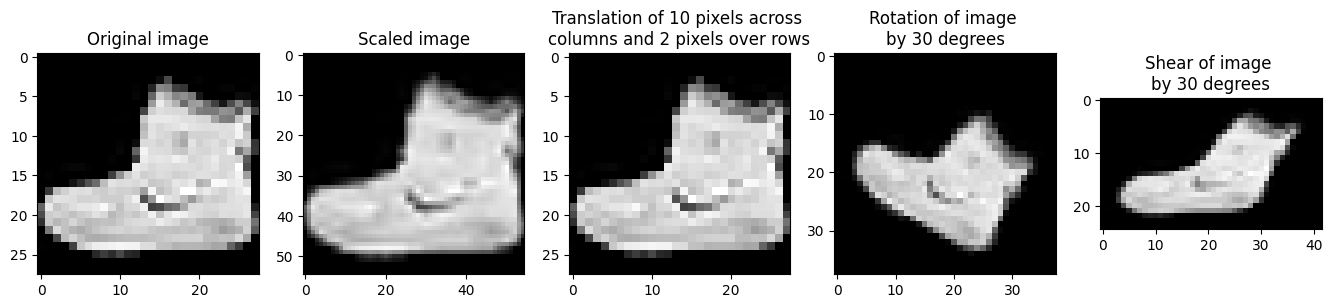

In [ ]:
plt.figure(figsize=(20,20))
plt.subplot(161)
plt.imshow(tr_images[0], cmap='gray')
plt.title('Original image')
plt.subplot(162)
aug = iaa.Affine(scale=2, fit_output=True)
plt.imshow(aug.augment_image(to_numpy(tr_images[0])), cmap='gray')
plt.title('Scaled image')
plt.subplot(163)
aug = iaa.Affine(translate_px={'x':10,'y':2}, fit_output=True, cval = 255)
plt.imshow(aug.augment_image(to_numpy(tr_images[0])), cmap='gray')
plt.title('Translation of 10 pixels across \ncolumns and 2 pixels over rows')
plt.subplot(164)
aug = iaa.Affine(rotate=30, fit_output=True)
plt.imshow(aug.augment_image(to_numpy(tr_images[0])), cmap='gray')
plt.title('Rotation of image \nby 30 degrees')
plt.subplot(165)
aug = iaa.Affine(shear=30, fit_output=True)
plt.imshow(aug.augment_image(to_numpy(tr_images[0])), cmap='gray')
plt.title('Shear of image \nby 30 degrees')

In the preceding image, the new pixels have been filled with a pixel value of 255, which corresponds to the color white.

Furthermore, there are different modes we can use to fill the values of newly created pixels. These values, which are for the mode parameter, are as follows:

- constant: Pads with a constant value.
- edge: Pads with the edge values of the array.
- symmetric: Pads with the reflection of the vector mirrored along the edge of the array.
- reflect: Pads with the reflection of the vector mirrored on the first and last values of the vector along each axis.
- wrap: Pads with the wrap of the vector along the axis.
The initial values are used to pad the end, while the end values are used to pad the beginning.

The outputs that we receive when cval is set to 0 and we vary the mode parameter are as follows:

Text(0.5, 1.0, 'Rotation of image by \n30 degrees with wrap mode')

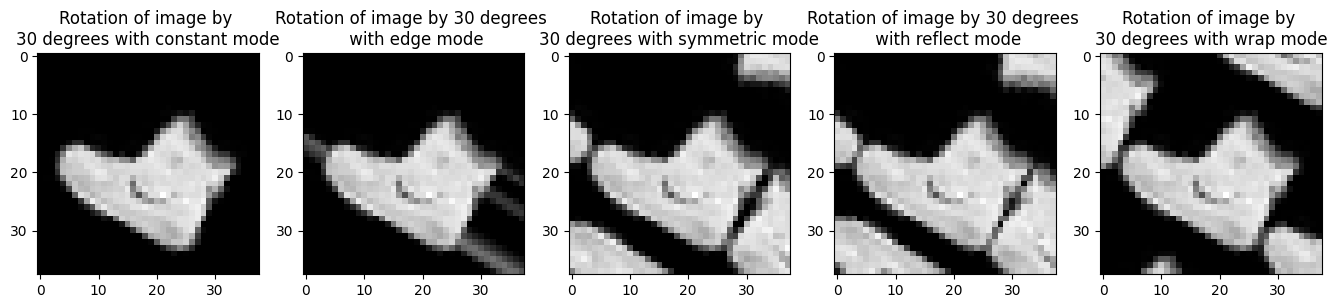

In [ ]:
plt.figure(figsize=(20,20))
plt.subplot(161)
aug = iaa.Affine(rotate=30, fit_output=True, cval=0, mode='constant')
plt.imshow(aug.augment_image(to_numpy(tr_images[0])), cmap='gray')
plt.title('Rotation of image by \n30 degrees with constant mode')
plt.subplot(162)
aug = iaa.Affine(rotate=30, fit_output=True, cval=0, mode='edge')
plt.imshow(aug.augment_image(to_numpy(tr_images[0])), cmap='gray')
plt.title('Rotation of image by 30 degrees \n with edge mode')
plt.subplot(163)
aug = iaa.Affine(rotate=30, fit_output=True, cval=0, mode='symmetric')
plt.imshow(aug.augment_image(to_numpy(tr_images[0])), cmap='gray')
plt.title('Rotation of image by \n30 degrees with symmetric mode')
plt.subplot(164)
aug = iaa.Affine(rotate=30, fit_output=True, cval=0, mode='reflect')
plt.imshow(aug.augment_image(to_numpy(tr_images[0])), cmap='gray')
plt.title('Rotation of image by 30 degrees \n with reflect mode')
plt.subplot(165)
aug = iaa.Affine(rotate=30, fit_output=True, cval=0, mode='wrap')
plt.imshow(aug.augment_image(to_numpy(tr_images[0])), cmap='gray')
plt.title('Rotation of image by \n30 degrees with wrap mode')

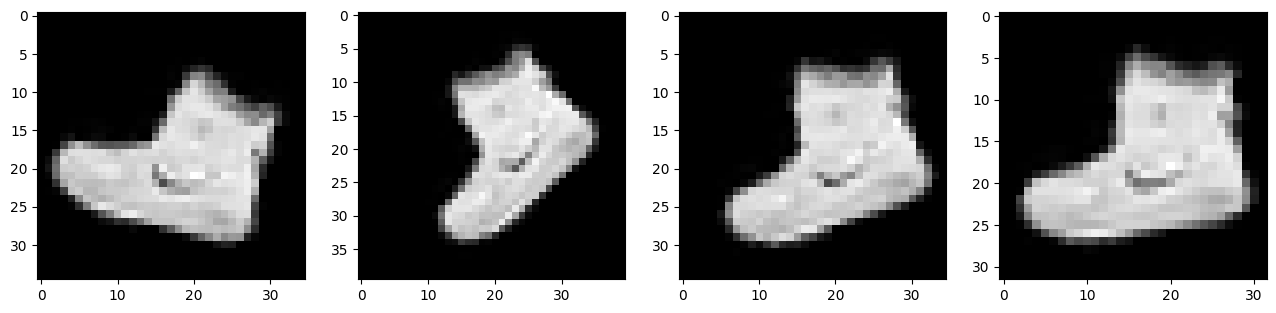

In [ ]:
plt.figure(figsize=(20,20))
plt.subplot(151)
aug = iaa.Affine(rotate=(-45,45), fit_output=True, cval=0, mode='constant')
plt.imshow(aug.augment_image(to_numpy(tr_images[0])), cmap='gray')
plt.subplot(152)
aug = iaa.Affine(rotate=(-45,45), fit_output=True, cval=0, mode='constant')
plt.imshow(aug.augment_image(to_numpy(tr_images[0])), cmap='gray')
plt.subplot(153)
aug = iaa.Affine(rotate=(-45,45), fit_output=True, cval=0, mode='constant')
plt.imshow(aug.augment_image(to_numpy(tr_images[0])), cmap='gray')
plt.subplot(154)
aug = iaa.Affine(rotate=(-45,45), fit_output=True, cval=0, mode='constant')
plt.imshow(aug.augment_image(to_numpy(tr_images[0])), cmap='gray')


## Change the Brightness
Imagine a situation where the distinction between image background and foreground isn't as stark as previously encountered. This occurs when the background doesn't register a pixel value of 0 and the foreground lacks a pixel value of 255, typically due to varying lighting conditions in the image.

During model training, if the background consistently registered as 0 and the foreground as 255, but in a prediction scenario, the background reads 20 and the foreground 220, it can lead to inaccurate predictions.

To mitigate such issues, augmentation techniques like Multiply and Linearcontrast come in handy. The Multiply method involves multiplying each pixel value by a specified factor. For instance, applying a factor of 0.5 to the pixels in the image we've discussed yields the following output:

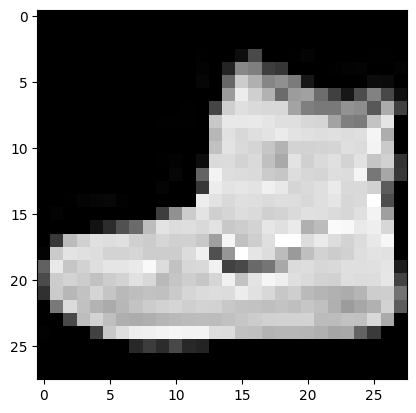

In [ ]:
aug = iaa.Multiply(1)
plt.imshow(aug.augment_image(to_numpy(tr_images[0])), cmap='gray')

Linearcontrast adjusts each pixel value based on the following formula:

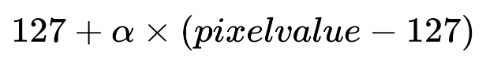

In the preceding equation, when α is equal to 1, the pixel values remain unchanged. However, when α is less than 1, high pixel values are reduced and low pixel values are increased.



Text(0.5, 1.0, 'Pixel contrast by 0.5')

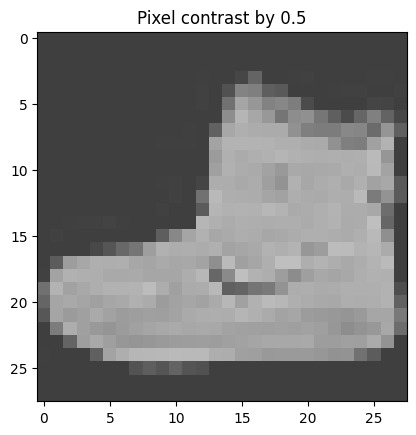

In [15]:
aug = iaa.LinearContrast(0.5)
plt.imshow(aug.augment_image(to_numpy(tr_images[0])), cmap='gray',vmin = 0, vmax = 255)
plt.title('Pixel contrast by 0.5')

Next, we'll blur the image to mimic a realistic scenario (where the image can be potentially blurred due to motion) using the GaussianBlur method:

Text(0.5, 1.0, 'Gaussian blurring of image')

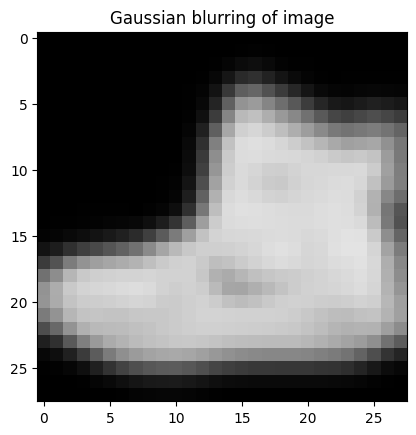

In [17]:
aug = iaa.GaussianBlur(sigma=1)
plt.imshow(aug.augment_image(to_numpy(tr_images[0])), cmap='gray', vmin = 0, vmax = 255)
plt.title('Gaussian blurring of image')

## Adding noise
In a real-world scenario, we may encounter grainy images due to bad photography conditions. Dropout and SaltAndPepper are two prominent methods that can help in simulating grainy image conditions. Let's take a look at the output of augmenting an image with these two methods:

Here, we can see that while the Dropout method dropped a certain amount of pixels randomly (that is, it converted them so that they had a pixel value of 0), the SaltAndPepper method added some white-ish and black-ish pixels randomly to our image.

Text(0.5, 1.0, 'Random 20% salt and pepper noise')

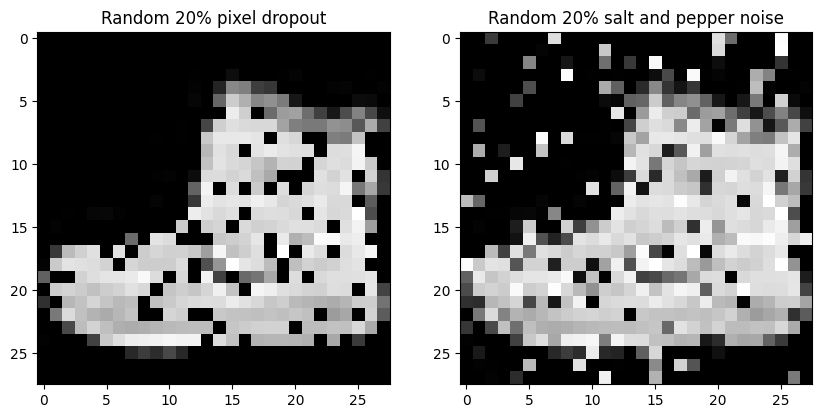

In [18]:
plt.figure(figsize=(10,10))
plt.subplot(121)
aug = iaa.Dropout(p=0.2)
plt.imshow(aug.augment_image(to_numpy(tr_images[0])), cmap='gray', vmin = 0, vmax = 255)
plt.title('Random 20% pixel dropout')
plt.subplot(122)
aug = iaa.SaltAndPepper(0.2)
plt.imshow(aug.augment_image(to_numpy(tr_images[0])), cmap='gray', vmin = 0, vmax = 255)
plt.title('Random 20% salt and pepper noise')

## Performing a sequence of augmentations
So far, we have looked at various augmentations and have also performed. However, in a real-world scenario, we would have to account for as many augmentations as possible. In this section, we will learn about the sequential way of performing augmentations.

Using the Sequential method, we can construct the augmentation method using all the relevant augmentations that must be performed. For our example, we'll only consider rotate and Dropout for augmenting our image. The Sequential object looks as follows:

Text(0.5, 1.0, 'Image augmented using a \nrandom orderof the two augmentations')

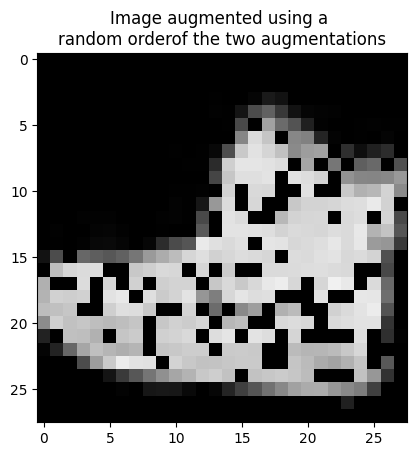

In [19]:
seq = iaa.Sequential([
      iaa.Dropout(p=0.2,),
    iaa.Affine(rotate=(-30,30))], random_order= True)

plt.imshow(seq.augment_image(to_numpy(tr_images[0])), cmap='gray',vmin = 0, vmax = 255)
plt.title('Image augmented using a \nrandom orderof the two augmentations')


## Performing data augmentation on a batch of images and the need for collate_fn

We've previously established the preference for applying diverse augmentations separately to the same image across different iterations.

When the augmentation pipeline is defined in the init method, it means augmentation occurs just once on the input image set, lacking variations across iterations.

Contrarily, placing augmentation in the getitem method, which is desirable for varied augmentations on each image, leads to a bottleneck: the augmentation is performed individually for each image. Augmenting a batch of images together rather than one by one would significantly enhance speed, especially when dealing with a larger set.

For a clearer comparison, let's examine two scenarios involving 32 images:

- Augmenting 32 images sequentially, one by one.
- Augmenting 32 images collectively as a batch.
We'll gauge the time taken to augment these 32 images in both scenarios using the initial 32 images from the Fashion-MNIST dataset.

In [20]:
from torchvision import datasets
import torch
data_folder = '/content/' # This can be any directory you want to download FMNIST to
fmnist = datasets.FashionMNIST(data_folder, download=True, train=True)

tr_images = fmnist.data
tr_targets = fmnist.targets

val_fmnist = datasets.FashionMNIST(data_folder, download=True, train=False)
val_images = val_fmnist.data
val_targets = val_fmnist.targets

In [23]:
from imgaug import augmenters as iaa
aug = iaa.Sequential([
              iaa.Affine(translate_px={'x':(-10,10)}, mode='constant'),
            ])


for i in range(32):
  aug.augment_image(to_numpy(tr_images[i]))


In [24]:
%%time
x = aug.augment_images(to_numpy(tr_images[:32]))

CPU times: user 18.4 ms, sys: 0 ns, total: 18.4 ms
Wall time: 28.8 ms


## Data augmentation for image translation
Now, we are in a position to train the model with augmented data. Let's create some augmented data and train the model:

In [25]:
from torchvision import datasets
import torch
from torch.utils.data import Dataset, DataLoader
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
device = 'cuda' if torch.cuda.is_available() else 'cpu'
data_folder = '/content/' # This can be any directory
# you want to download FMNIST to
fmnist = datasets.FashionMNIST(data_folder,
                               download=True,
                               train=True)
tr_images = fmnist.data
tr_targets = fmnist.targets
val_fmnist = datasets.FashionMNIST(data_folder,
                                   download=True,
                                   train=False)
val_images = val_fmnist.data
val_targets = val_fmnist.targets

In [46]:
from imgaug import augmenters as iaa
aug = iaa.Sequential([
    iaa.Affine(translate_px={'x':(-10,10)},
        mode='constant'),
])

In [52]:
def to_numpy(x: torch.Tensor) -> np.ndarray:
    return x.cpu().detach().numpy()


class FMNISTDataset(Dataset):
    def __init__(
        self,
        x: torch.Tensor,
        y: torch.Tensor,
        aug: imgaug.augmenters.Augmenter | None = None,
    ) -> None:
        self.x, self.y = x, y
        self.aug = aug

    def __getitem__(self, ix: int) -> tuple[torch.Tensor, torch.Tensor]:
        x, y = self.x[ix], self.y[ix]
        return x, y

    def __len__(self) -> int:
        return len(self.x)

    def collate_fn(
        self, batch: list[tuple[torch.Tensor, torch.Tensor]]
    ) -> tuple[torch.Tensor, torch.Tensor]:
        ims, classes = zip(*batch)
        ims = torch.stack(ims)
        if self.aug:
            ims = self.aug.augment_images(images=to_numpy(ims))
        ims = torch.tensor(ims)[:, None, :, :] / 255.0
        classes = torch.tensor(classes)
        return ims, classes

In [53]:
from torch.optim import SGD, Adam
def get_model():
    model = nn.Sequential(
        nn.Conv2d(1, 64, kernel_size=3),
        nn.MaxPool2d(2),
        nn.ReLU(),
        nn.Conv2d(64, 128, kernel_size=3),
        nn.MaxPool2d(2),
        nn.ReLU(),
        nn.Flatten(),
        nn.Linear(3200, 256),
        nn.ReLU(),
        nn.Linear(256, 10)
    ).to(device)
    loss_fn = nn.CrossEntropyLoss()
    optimizer = Adam(model.parameters(), lr=1e-3)
    return model, loss_fn, optimizer


In [54]:
def train_batch(x, y, model, opt, loss_fn):
    model.train()
    prediction = model(x)
    batch_loss = loss_fn(prediction, y)
    batch_loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    return batch_loss.item()

In [55]:
def get_data():
    train = FMNISTDataset(tr_images, tr_targets, aug=aug)
    'notice the collate_fn argument'
    trn_dl = DataLoader(train, batch_size=64,
                collate_fn=train.collate_fn, shuffle=True)
    val = FMNISTDataset(val_images, val_targets)
    val_dl = DataLoader(val, batch_size=len(val_images),
                collate_fn=val.collate_fn, shuffle=True)
    return trn_dl, val_dl


In [56]:

trn_dl, val_dl = get_data()
model, loss_fn, optimizer = get_model()
for epoch in range(5):
    print(epoch)
    for ix, batch in enumerate(iter(trn_dl)):
        x, y = batch
        batch_loss = train_batch(x, y, model, optimizer, loss_fn)



0
1
2
3
4


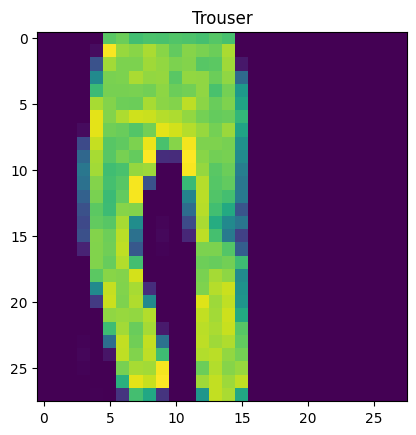

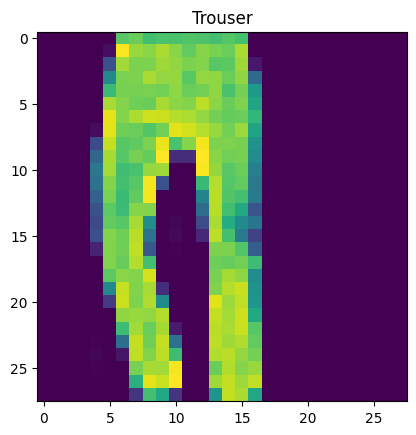

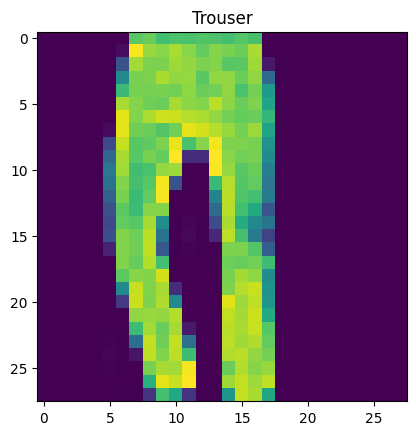

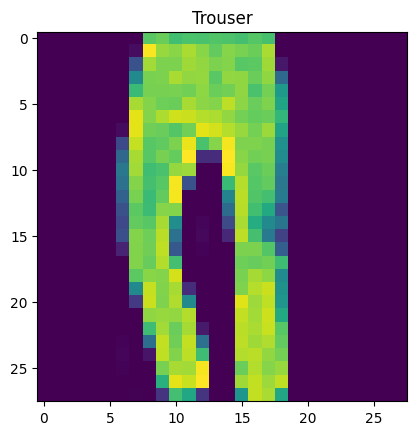

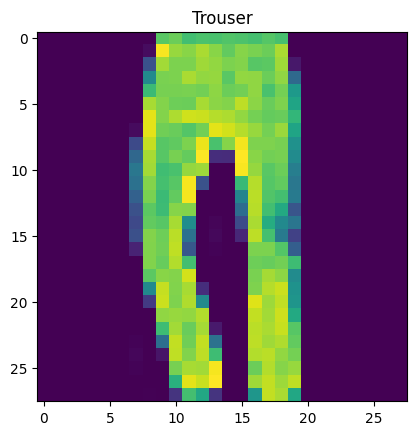

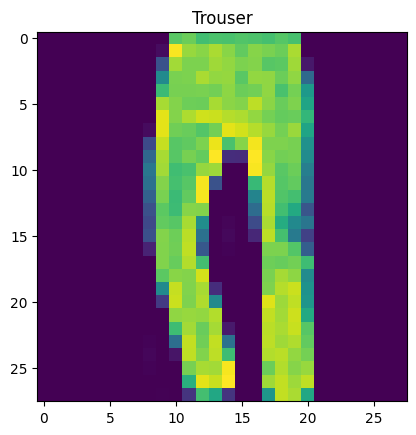

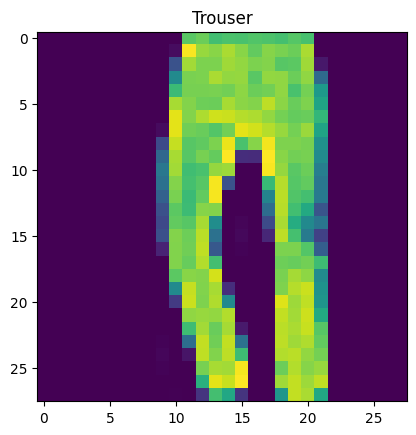

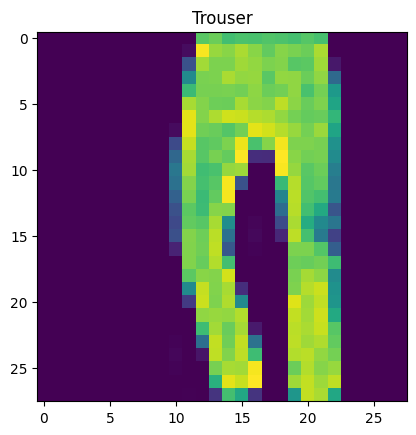

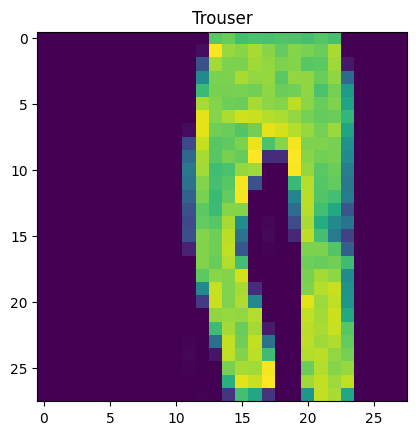

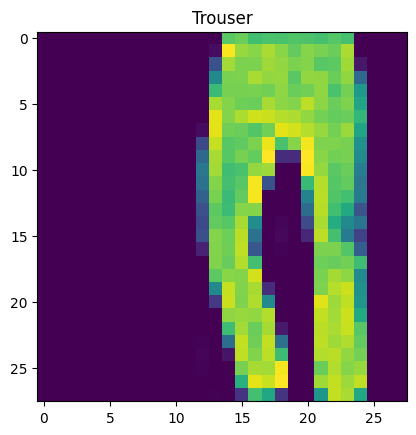

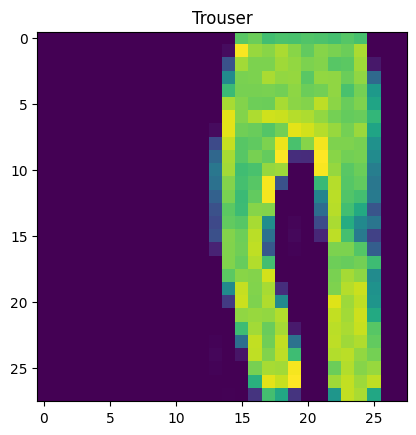

In [57]:
preds = []
ix = 24300
for px in range(-5,6):
    img = tr_images[ix]/255.
    img = img.view(28, 28)
    img2 = np.roll(img, px, axis=1)
    img3 = torch.Tensor(img2).view(-1,1,28,28).to(device)
    np_output = model(img3).cpu().detach().numpy()
    pred = np.exp(np_output)/np.sum(np.exp(np_output))
    preds.append(pred)
    plt.imshow(img2)
    plt.title(fmnist.classes[pred[0].argmax()])
    plt.show()

<Axes: title={'center': 'Probability of each class for various translations'}>

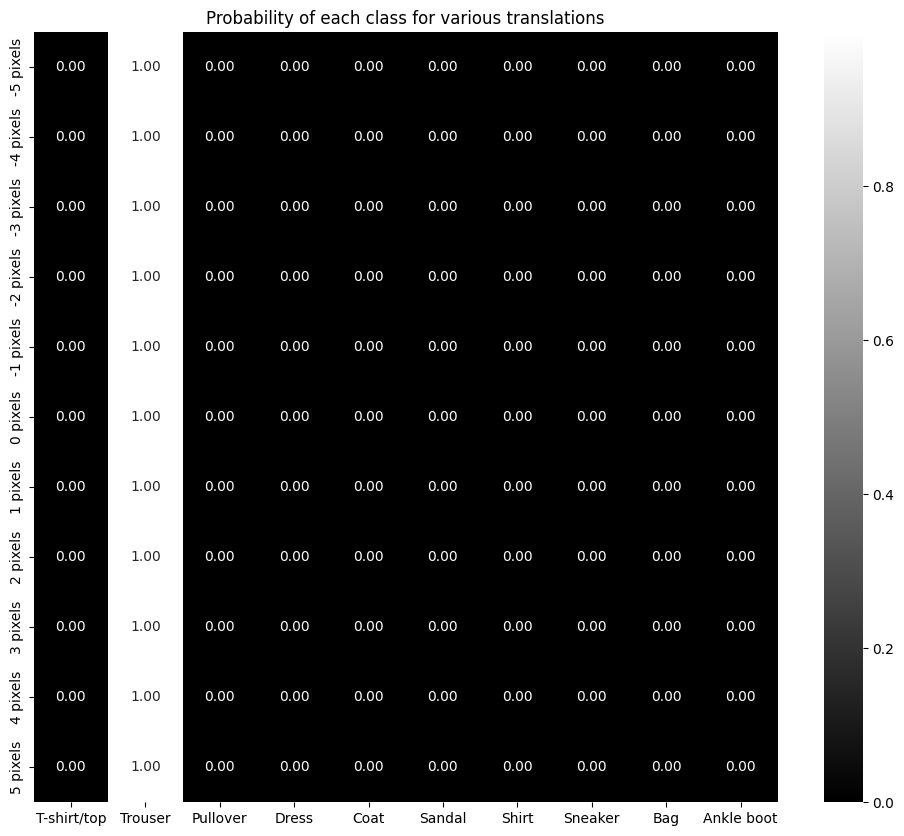

In [58]:
import seaborn as sns
fig, ax = plt.subplots(1,1, figsize=(12,10))
plt.title('Probability of each class for various translations')
sns.heatmap(np.array(preds).reshape(11,10), annot=True, ax=ax, fmt='.2f', xticklabels=fmnist.classes, yticklabels=[str(i)+str(' pixels') for i in range(-5,6)], cmap='gray')

## Visualizing the outcome of feature learning

Up to now, we've grasped how CNNs excel in image classification, even when images undergo translations. Filters, as a pivotal element, contribute significantly to learning image features, essential for accurate classification. However, the specifics of what these filters learn, making them potent, have yet to be addressed.

In this section, our focus is on unraveling what these filters discern, enabling CNNs to proficiently classify images. To achieve this, we'll delve into a dataset containing images of X's and O's. Additionally, we'll scrutinize the activations of the fully connected layer (flatten layer) to gain insight into their characteristics. Let's explore the essence of what these filters actually learn.

In [67]:
!wget https://www.dropbox.com/s/5jh4hpuk2gcxaaq/all.zip
!unzip all.zip

--2024-01-01 07:04:29--  https://www.dropbox.com/s/5jh4hpuk2gcxaaq/all.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.4.18, 2620:100:6018:18::a27d:312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.4.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/5jh4hpuk2gcxaaq/all.zip [following]
--2024-01-01 07:04:30--  https://www.dropbox.com/s/raw/5jh4hpuk2gcxaaq/all.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc108a57c6328def8334342ad957.dl.dropboxusercontent.com/cd/0/inline/CKiixtWoJhQSy4mM6_03WGroIO9n7zqMklqY6ZQmFZrdnfk-U2FQyRFSK4zyTL17-RCmn-RWYMyEy5jrXQniCLKq3hiWKGBVrBFhg7RXhdTnzpUGoSIXPPdon7VeajuRByDlQBNFsC4kBAbU2iQiYVy5/file# [following]
--2024-01-01 07:04:30--  https://uc108a57c6328def8334342ad957.dl.dropboxusercontent.com/cd/0/inline/CKiixtWoJhQSy4mM6_03WGroIO9n7zqMklqY6ZQmFZrdnfk-U2FQyRFSK4zyTL17-RCmn-RWYMyEy5jrXQniCLKq3hiWKGBVrBFhg7RXhdTnzpUGoSIXP

In [68]:
import torch
from torch import nn
from torch.utils.data import TensorDataset, Dataset, DataLoader
from torch.optim import SGD, Adam
device = 'cuda' if torch.cuda.is_available() else 'cpu'
from torchvision import datasets
import numpy as np, cv2
import matplotlib.pyplot as plt
from glob import glob
%matplotlib inline
from imgaug import augmenters as iaa

In [69]:
tfm = iaa.Sequential(iaa.Resize(28))
class XO(Dataset):
    def __init__(self, folder):
        self.files = glob(folder)
    def __len__(self): return len(self.files)
    def __getitem__(self, ix):
        f = self.files[ix]
        im = tfm.augment_image(cv2.imread(f)[:,:,0])
        im = im[None]
        cl = f.split('/')[-1].split('@')[0] == 'x'
        return torch.tensor(1 - im/255).to(device).float(), torch.tensor([cl]).float().to(device)

In [70]:
data = XO('/content/all/*')

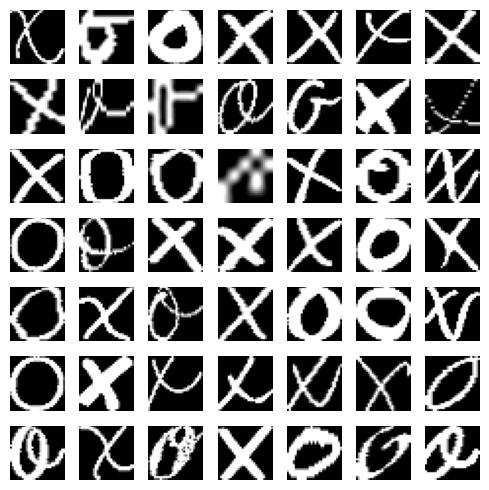

In [71]:
R, C = 7,7
fig, ax = plt.subplots(R, C, figsize=(5,5))
for label_class, plot_row in enumerate(ax):
    for plot_cell in plot_row:
        plot_cell.grid(False); plot_cell.axis('off')
        ix = np.random.choice(1000)
        im, label = data[ix]
        print()
        plot_cell.imshow(im[0].cpu(), cmap='gray')
plt.tight_layout()

Define the model architecture, loss function, and the optimizer:

In [72]:
from torch.optim import SGD, Adam
def get_model():
    model = nn.Sequential(
                nn.Conv2d(1, 64, kernel_size=3),
                nn.MaxPool2d(2),
                nn.ReLU(),
                nn.Conv2d(64, 128, kernel_size=3),
                nn.MaxPool2d(2),
                nn.ReLU(),
                nn.Flatten(),
                nn.Linear(3200, 256),
                nn.ReLU(),
                nn.Linear(256, 1),
                nn.Sigmoid()
            ).to(device)

    loss_fn = nn.BCELoss()
    optimizer = Adam(model.parameters(), lr=1e-3)
    return model, loss_fn, optimizer

In [73]:
!pip install torch_summary
from torchsummary import summary
model, loss_fn, optimizer = get_model()
summary(model, torch.zeros(1,1,28,28));

Layer (type:depth-idx)                   Output Shape              Param #
├─Conv2d: 1-1                            [-1, 64, 26, 26]          640
├─MaxPool2d: 1-2                         [-1, 64, 13, 13]          --
├─ReLU: 1-3                              [-1, 64, 13, 13]          --
├─Conv2d: 1-4                            [-1, 128, 11, 11]         73,856
├─MaxPool2d: 1-5                         [-1, 128, 5, 5]           --
├─ReLU: 1-6                              [-1, 128, 5, 5]           --
├─Flatten: 1-7                           [-1, 3200]                --
├─Linear: 1-8                            [-1, 256]                 819,456
├─ReLU: 1-9                              [-1, 256]                 --
├─Linear: 1-10                           [-1, 1]                   257
├─Sigmoid: 1-11                          [-1, 1]                   --
Total params: 894,209
Trainable params: 894,209
Non-trainable params: 0
Total mult-adds (M): 10.13
Input size (MB): 0.00
Forward/backward pass s

Define a function for training on batches that takes images and their classes as input and returns their loss values and accuracy after backpropagation has been performed on top of the given batch of data:

In [74]:
def train_batch(x, y, model, opt, loss_fn):
    model.train()
    prediction = model(x)
    is_correct = (prediction > 0.5) == y
    batch_loss = loss_fn(prediction, y)
    batch_loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    return batch_loss.item(), is_correct[0]

Define a DataLoader where the input is the Dataset class:

In [75]:
trn_dl = DataLoader(XO('/content/all/*'), batch_size=32, \
                    drop_last=True)

model, loss_fn, optimizer = get_model()

# Train the model over 5 epochs:
for epoch in range(5):
    for ix, batch in enumerate(iter(trn_dl)):
        x, y = batch
        batch_loss = train_batch(x, y, model, optimizer, \
                                        loss_fn)


## Fetch an image to check what the filters learn about the image:


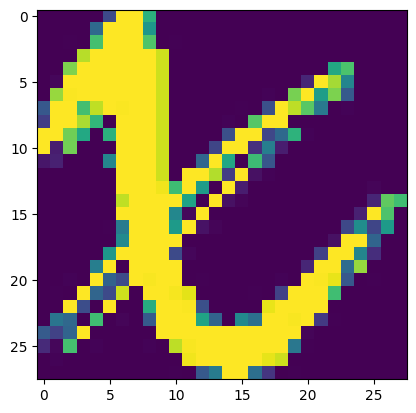

In [76]:
im, c = trn_dl.dataset[2]
plt.imshow(im[0].cpu())
plt.show()

Pass the image through the trained model and fetch the output of the first layer. Then, store it in the intermediate_output variable:

In [77]:
first_layer = nn.Sequential(*list(model.children())[:1])
intermediate_output = first_layer(im[None])[0].detach()

Plot the output of the 64 filters. Each channel in intermediate_output is the output of the convolution for each filter:

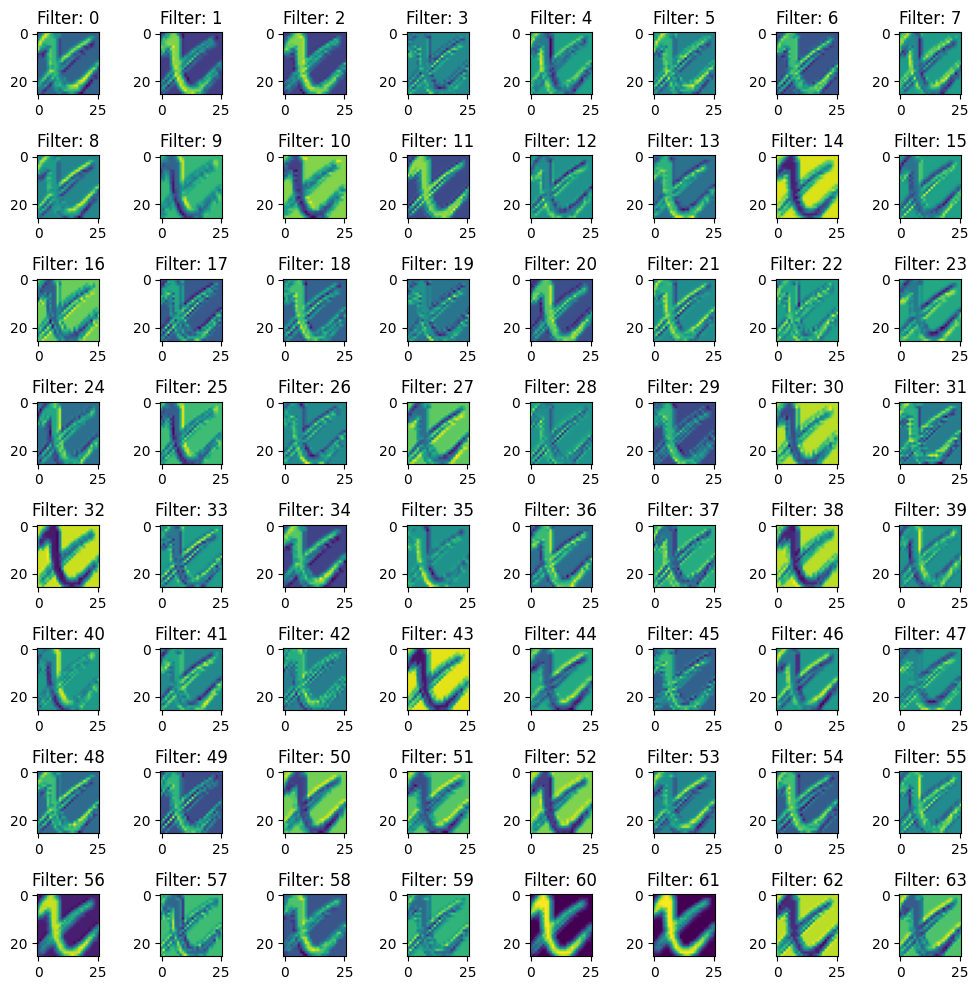

In [78]:
fig, ax = plt.subplots(8, 8, figsize=(10,10))
for ix, axis in enumerate(ax.flat):
    axis.set_title('Filter: '+str(ix))
    axis.imshow(intermediate_output[ix].cpu())
plt.tight_layout()
plt.show()

Pass multiple O images and inspect the output of the fourth filter across the images (we are only using the fourth filter for illustration purposes; you can choose a different filter if you wish):

In [79]:
# Fetch multiple O images from the data:
x, y = next(iter(trn_dl))
x2 = x[y==0]

###  Reshape x2 so that it has a proper input shape for a CNN model; that is, batch size x channels x height x width:

In [80]:
x2 = x2.view(-1,1,28,28)

#### Define a variable that stores the model until the first layer:

In [81]:
first_layer = nn.Sequential(*list(model.children())[:1])

#### Extract the output of passing the O images (x2) through the model until the first layer (first_layer), as defined previously:

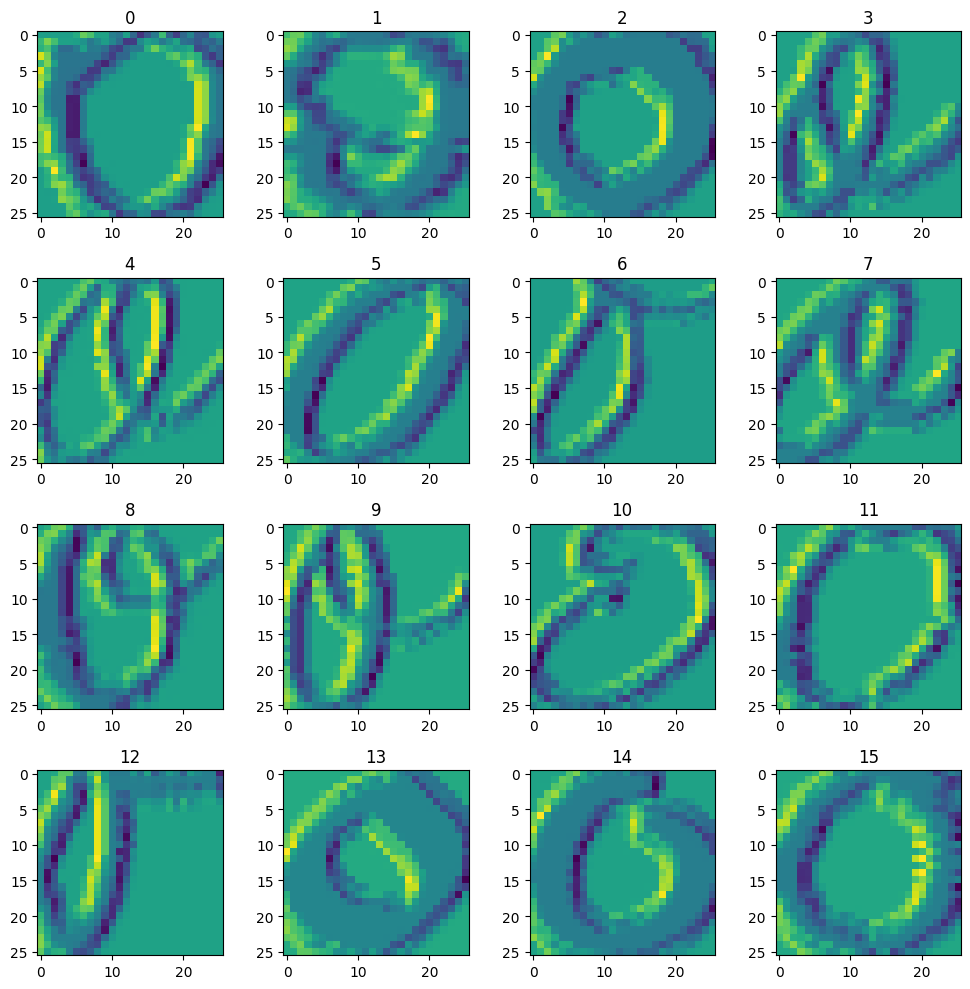

In [82]:
first_layer_output = first_layer(x2).detach()

n = 4
fig, ax = plt.subplots(n, n, figsize=(10,10))
for ix, axis in enumerate(ax.flat):
    axis.imshow(first_layer_output[ix,4,:,:].cpu())
    axis.set_title(str(ix))
plt.tight_layout()
plt.show()

#### Now, let's create another model that extracts layers until the second convolution layer (that is, until the four layers defined in the preceding model) and then extracts the output of passing the original O image. We will then plot the output of convolving the filters in the second layer with the input O image:

In [83]:
second_layer = nn.Sequential(*list(model.children())[:4])
second_intermediate_output=second_layer(im[None])[0].detach()

##### Plot the output of convolving the filters with the respective image:

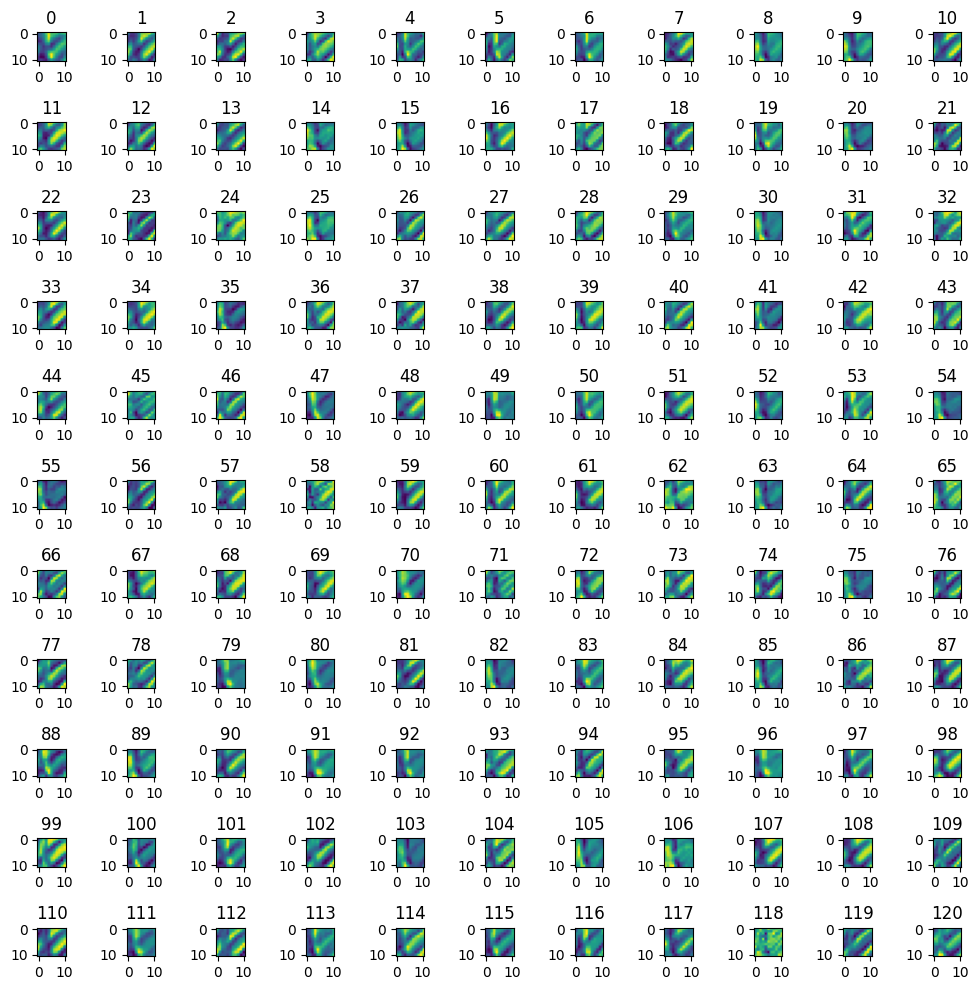

In [84]:
fig, ax = plt.subplots(11, 11, figsize=(10,10))
for ix, axis in enumerate(ax.flat):
    axis.imshow(second_intermediate_output[ix].cpu())
    axis.set_title(str(ix))
plt.tight_layout()
plt.show()

##### Now, let's use the 34th filter's output in the preceding image as an example. When we pass multiple O images through filter 34, we should see similar activations across images. Let's test this, as follows:

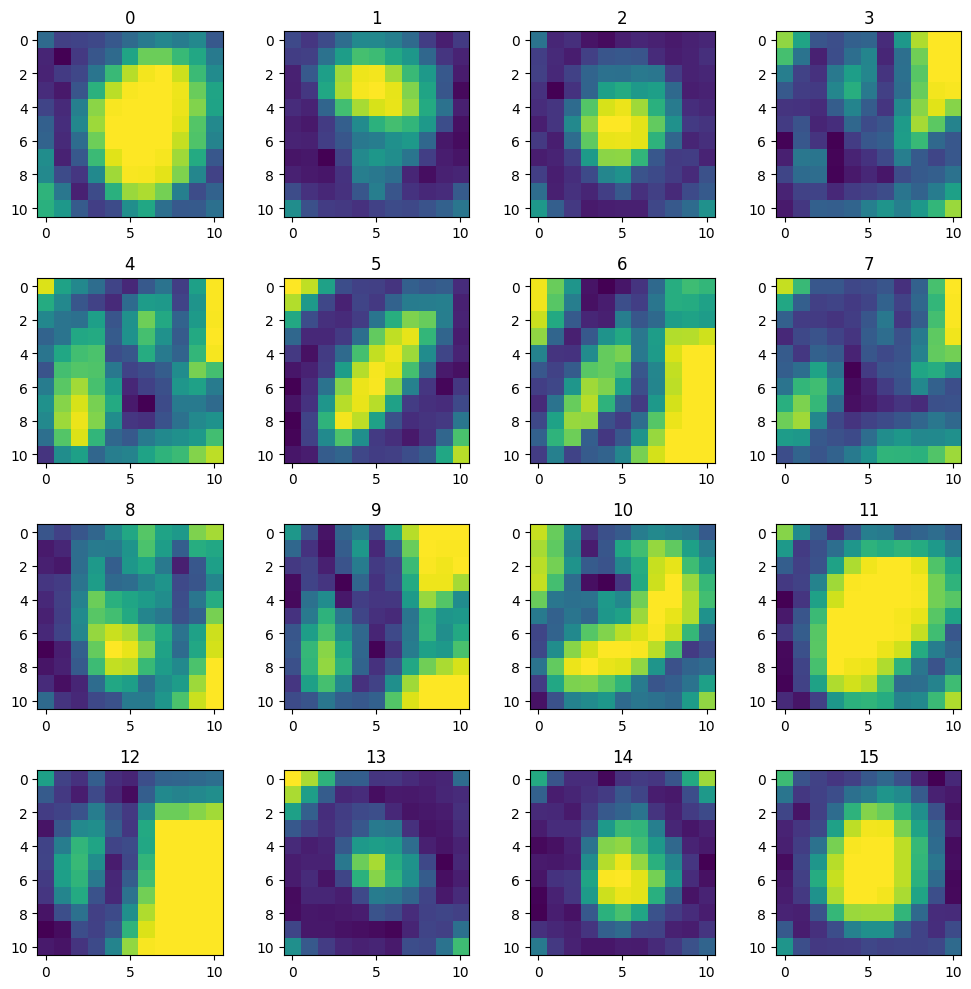

In [85]:
second_layer = nn.Sequential(*list(model.children())[:4])
second_intermediate_output = second_layer(x2).detach()
fig, ax = plt.subplots(4, 4, figsize=(10,10))
for ix, axis in enumerate(ax.flat):
    axis.imshow(second_intermediate_output[ix,34,:,:].cpu())
    axis.set_title(str(ix))
plt.tight_layout()
plt.show()

#### Plot the activations of a fully connected layer, as follows:


In [86]:
custom_dl= DataLoader(XO('/content/all/*'),batch_size=2498, \
                       drop_last=True)

Next, choose only the O images from the dataset and then reshape them so that they can be passed as input to our CNN model:

In [87]:
x, y = next(iter(custom_dl))
x2 = x[y==0]
x2 = x2.view(len(x2),1,28,28)

Fetch the flatten (fully connected) layer and pass thee preceding images through the model until they reach the flattened layer:

In [88]:
flatten_layer = nn.Sequential(*list(model.children())[:7])
flatten_layer_output = flatten_layer(x2).detach()

#### Plot the flattened layer:

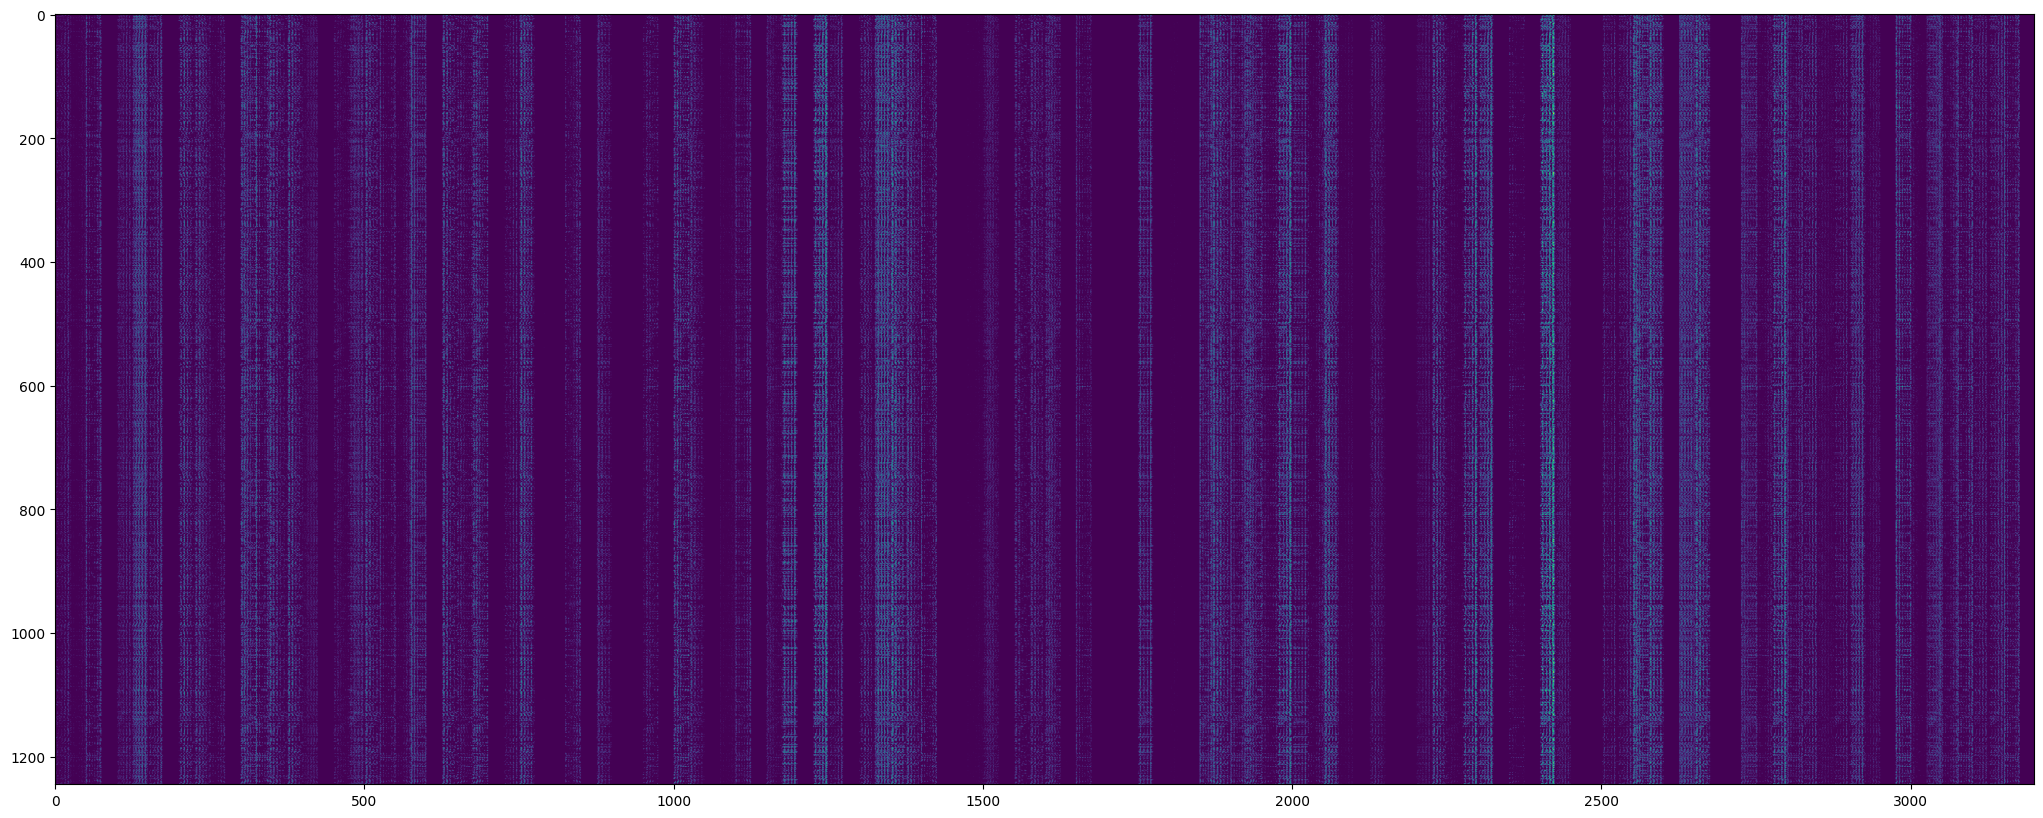

In [89]:
plt.figure(figsize=(100,10))
plt.imshow(flatten_layer_output.cpu())

## EXAMPLE 2

In [59]:
import shutil
from pathlib import Path
from urllib.request import urlretrieve
import PIL
import torch
import torch.utils.data as data
from torchvision import datasets, transforms
import urllib.request
import os

In [60]:
DATASET_LINK = 'https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz'
WORKING_DIR_PATH = Path('.')
FLOWERS_PATH = WORKING_DIR_PATH / 'flower_photos'
IMAGE_SIZE = 64
BATCH_SIZE = 128

## Data Collection
Use the data set link created above to download the flower images in your Google Colab instance. Create a new code cell and add the code below.

In [62]:
def download_and_unpack_file(link, filename, unpack=True):
    if (WORKING_DIR_PATH / filename).exists():
        return
    archname = link.split('/')[-1]
    urllib.request.urlretrieve(link, archname)
    urllib.request.urlcleanup()
    shutil.unpack_archive(archname, WORKING_DIR_PATH)
    os.remove(archname)
download_and_unpack_file(DATASET_LINK, 'flower_photos.tgz', unpack=False)

## Image Augmentation

In [63]:
transform= transforms.Compose([
    transforms.Resize(IMAGE_SIZE),
    transforms.RandomHorizontalFlip(),
    transforms.ColorJitter(brightness=0.5, contrast=0.5, saturation=0.2, hue=0.1),
    transforms.RandomAffine(3, scale=(0.95, 1.05)),
    transforms.ToTensor()
])

##PREVIEW IMAGE

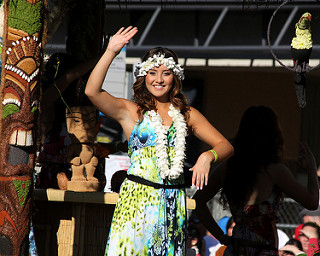

In [66]:
roses = list(FLOWERS_PATH.glob('roses/*'))
PIL.Image.open(str(roses[0]))

## Load Data
PyTorch provides developers an intuitive interface to load images located in a folder. Afterward, you will create training and validation datasets you need to use later on.



In [65]:
data_dir = './flower_photos'
dataset = datasets.ImageFolder( data_dir , transform=transform)
train_set, val_set = data.random_split(dataset, [3000, 670])
trainloader = data.DataLoader(train_set, batch_size=BATCH_SIZE)
testloader = data.DataLoader(val_set, batch_size=BATCH_SIZE)

## EXAMPLE 3 How to Train models using Deep Lake and PyTorch Lightning

In [90]:
from IPython.display import clear_output
!pip3 install deeplake
!pip3 install pytorch-lightning
clear_output()

## Data Preprocessing

In [91]:
import deeplake
from PIL import Image
import torch
from torchvision import transforms, models
import pytorch_lightning as pl

# Connect to the training and testing datasets
ds_train = deeplake.load('hub://activeloop/fashion-mnist-train')
ds_val = deeplake.load('hub://activeloop/fashion-mnist-test')

/

Opening dataset in read-only mode as you don't have write permissions.


-

This dataset can be visualized in Jupyter Notebook by ds.visualize() or at https://app.activeloop.ai/activeloop/fashion-mnist-train



/

hub://activeloop/fashion-mnist-train loaded successfully.



/

Opening dataset in read-only mode as you don't have write permissions.


/

This dataset can be visualized in Jupyter Notebook by ds.visualize() or at https://app.activeloop.ai/activeloop/fashion-mnist-test



\

hub://activeloop/fashion-mnist-test loaded successfully.



The next step is to define a transformation function that will process the data and convert it into a format that can be passed into a deep learning model. In this particular example, torchvision.transforms is used as a part of the transformation pipeline that performs operations such as normalization and image augmentation (rotation).

In [92]:
tform = transforms.Compose([
    transforms.RandomRotation(20), # Image augmentation
    transforms.ToTensor(), # Must convert to pytorch tensor for subsequent operations to run
    transforms.Normalize([0.5], [0.5]),
])

You can now create a pytorch dataloader that connects the Deep Lake dataset to the PyTorch model using the provided method ds.pytorch(). This method automatically applies the transformation function and takes care of random shuffling (if desired). The num_workers parameter can be used to parallelize data preprocessing, which is critical for ensuring that preprocessing does not bottleneck the overall training workflow.

In [93]:
batch_size = 32

# Since torchvision transforms expect PIL images, we use the 'pil' decode_method for the 'images' tensor. This is much faster than running ToPILImage inside the transform
train_loader = ds_train.pytorch(num_workers = 0, shuffle = True, transform = {'images': tform, 'labels': None}, batch_size = batch_size, decode_method = {'images': 'pil'})
val_loader = ds_val.pytorch(num_workers = 0, transform = {'images': tform, 'labels': None}, batch_size = batch_size, decode_method = {'images': 'pil'})

## Model and LightningModule Definition

In [94]:
# Use a pre-trained ResNet18
def get_model(num_classes):
    model = models.resnet18(pretrained=True)

    # Convert model to grayscale
    model.conv1 = torch.nn.Conv2d(1, 64, kernel_size=7, stride=2, padding=3, bias=False)

    # Update the fully connected layer based on the number of classes in the dataset
    model.fc = torch.nn.Linear(model.fc.in_features, num_classes)

    return model

In [95]:
class FashionMnistModule(pl.LightningModule):
    def __init__(self, num_classes):
        """
        Inputs:
            num_classes: Number of classes in the dataset and model
        """
        super().__init__()

        # Create the model
        self.model = get_model(num_classes)

        # Create loss module
        self.loss_module = torch.nn.CrossEntropyLoss()

    def forward(self, imgs):
        return self.model(imgs)

    def configure_optimizers(self):
        return torch.optim.SGD(self.model.parameters(), lr=0.001, momentum=0.1)

    def training_step(self, batch, batch_idx):
        images = batch['images']
        labels = torch.squeeze(batch['labels'])

        preds = self.model(images)
        loss = self.loss_module(preds, labels)

        acc = (preds.argmax(dim=-1) == labels).float().mean()

        self.log("train_acc", acc, on_step=True, on_epoch=True)
        self.log("train_loss", loss)

        return loss

    def validation_step(self, batch, batch_idx):

        images = batch['images']
        labels = torch.squeeze(batch['labels'])
        preds = self.model(images).argmax(dim=-1)
        acc = (labels == preds).float().mean()

        # Log the valdation accuracy to the progress bar at the end of each epoch
        self.log("val_acc", acc, on_epoch=True, prog_bar=True)

## Training the Model

In [96]:
trainer = pl.Trainer(max_epochs = 3)
trainer.fit(model=FashionMnistModule(len(ds_train.labels.info.class_names)), train_dataloaders = train_loader, val_dataloaders = val_loader)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=1` in the `DataLoader` to improve performance.
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/utilities/data.py:121: Your `IterableDataset` has `__len__` defined. In combination with multi-process data loading (when num_workers > 1), `__len__` could be inaccurate if each worker is not configured independently to avoid having duplicate data.
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=1` in the `DataLoader` to improve performance.


Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.


## Resources:
-- https://pytorch.org/vision/0.15/transforms.html

-- Comparing Different Automatic Image Augmentation Methods in PyTorch https://sebastianraschka.com/blog/2023/data-augmentation-pytorch.html

-- Data Albumentation: https://www.scaler.com/topics/pytorch/data-augmentations-in-python/

-- https://docs.activeloop.ai/example-code/tutorials/deep-learning/training-models/training-models-using-pytorch-lightning

-- https://wandb.ai/sauravmaheshkar/Dataset-DataLoader/reports/An-Introduction-to-Datasets-and-DataLoader-in-PyTorch--VmlldzoxMDI5MTY2

-- https://www.kaggle.com/code/limitz/pytorch-dataset-with-volumetric-augmentations

- https://www.linkedin.com/pulse/revolutionize-your-pytorch-workflow-how-speed-up-deep-jozsef-szalma/

-- https://wandb.ai/sauravmaheshkar/RSNA-MICCAI/reports/How-to-Set-Random-Seeds-in-PyTorch-and-Tensorflow--VmlldzoxMDA2MDQy

-- https://github.com/aaron-xichen/pytorch-playground/blob/master/stl10/train.py
